In [ ]:
# Import packages
import os 
import warnings
import gc

import pickle
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report
import seaborn as sns

# Configuration
warnings.simplefilter('ignore')
pd.set_option('max_columns', 50)

## Working with NSL KDD-CUP 99

In [ ]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type']

In [ ]:
full_df = pd.read_csv('/content/kddcup.csv', names=features, header=None)
full_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


## Exploratory Data Analysis

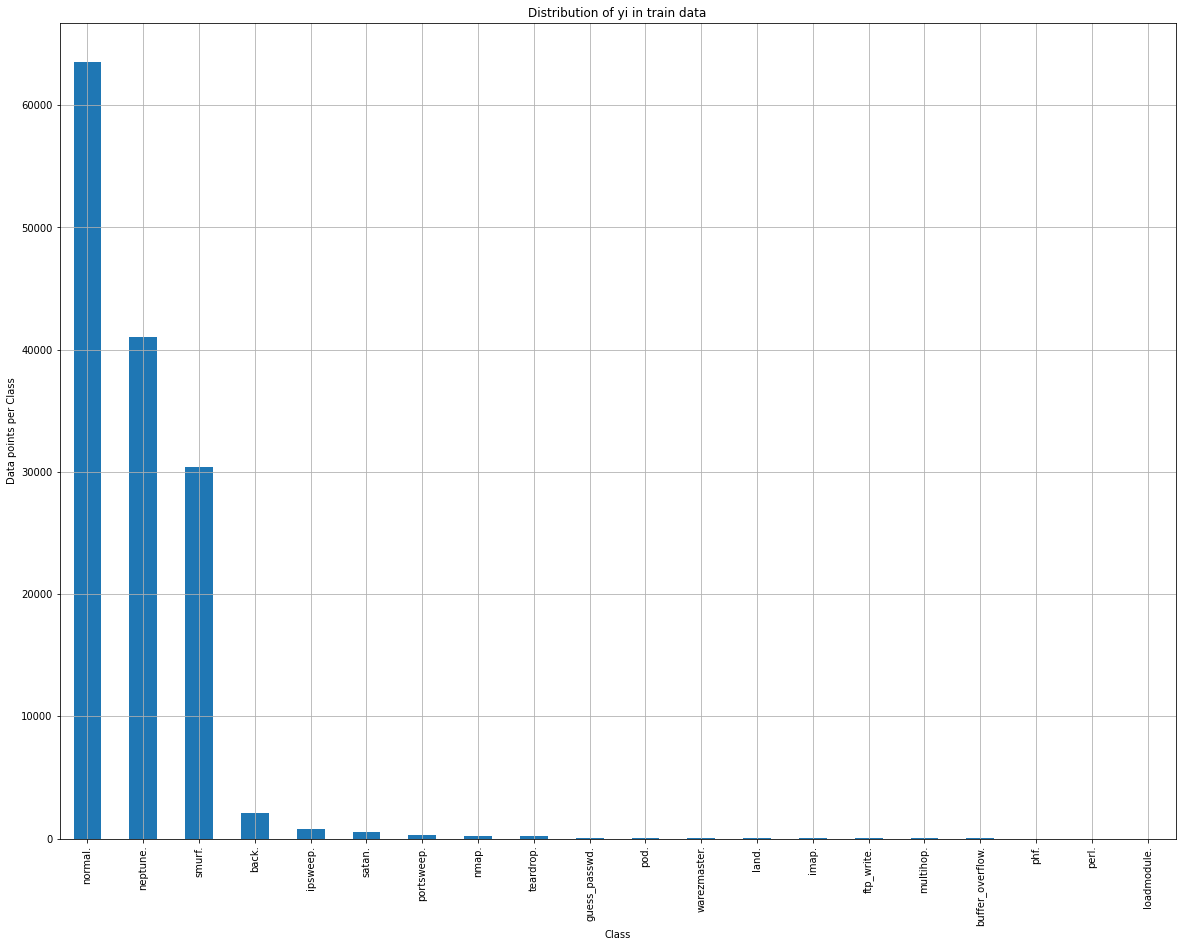

In [ ]:
plt.figure(figsize=(20,15))
class_distribution = full_df['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

## Downloading the binary labeled Dataset from Kaggle directly.

In [ ]:
!chmod 600 /content/kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sampadab17/network-intrusion-detection
!unzip /content/network-intrusion-detection.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
network-intrusion-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/network-intrusion-detection.zip
replace Test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Train_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Reading the Dataset

In [ ]:
train = pd.read_csv("/content/Train_data.csv")
test = pd.read_csv("/content/Test_data.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
test = train.sample(1)
test.to_csv('test.csv')

In [ ]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    1
Name: num_outbound_cmds, dtype: int64


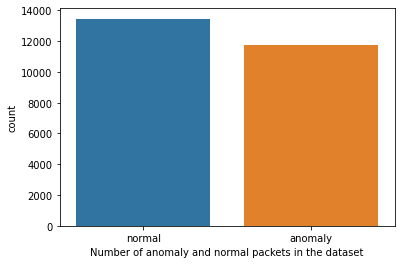

In [ ]:
sns.countplot(train['class'])
plt.xlabel('Number of anomaly and normal packets in the dataset');

## Cleaning the dataset

In [ ]:
print('Null values in train dataset are',len(train[train.isnull().any(1)]))
print('Null values in test dataset are',len(test[test.isnull().any(1)]))

Null values in train dataset are 0
Null values in test dataset are 0


## Scaling numbering features of the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
cols_names = train.select_dtypes(include=['float64', 'int64']).columns
scale_train = scaler.fit_transform(train.select_dtypes(include=['float64', 'int64']))
scale_test = scaler.fit_transform(test.select_dtypes(include=['float64', 'int64']))

**creating training and testing dataframes with scaled values**

In [ ]:
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(scale_train, columns = cols_names)
sc_testdf = pd.DataFrame(scale_test, columns = cols_names)

## Encoding categorical attributes in the datasets

In [ ]:
cat_train = train.select_dtypes(include=['object']).copy()
cat_test =  test.select_dtypes(include=['object']).copy()

In [ ]:
train_cat = cat_train.apply(encoder.fit_transform)
test_cat = cat_test.apply(encoder.fit_transform)
encoder.classes_

array(['anomaly'], dtype=object)

In [ ]:
# separate target column from encoded data 
enctrain = train_cat.drop(['class'], axis=1)
cat_Ytrain = train_cat[['class']].copy()

In [ ]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape

(25192, 41)

In [ ]:
train_x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.720244,-0.354628,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.624317,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-1.320567,0.490836,-0.373886,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,0.334947,-0.299430,1.595477,1.600209,-0.372186,-0.373098,-1.388806,0.042773,-0.373886,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.694082,-0.313230,-0.193018,-0.187141,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.476067,0.059355,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.023115,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9


In [ ]:
pickle.dump(scaler, open('/content/theScaler.pkl','wb'))

## Feature Extraction

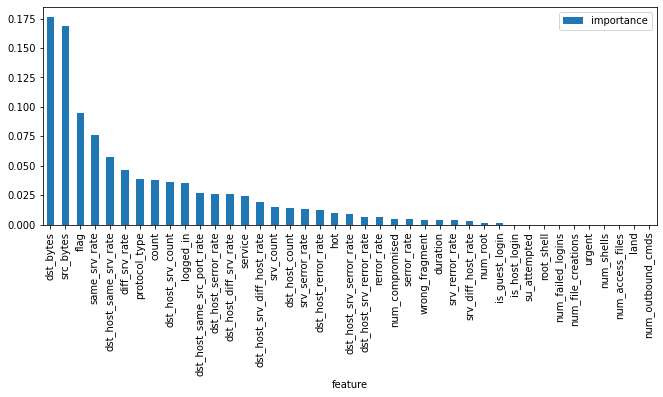

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'service',
 'flag']

## Spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

## Naive Baye Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB

NB_model = BernoulliNB()
NB_model.fit(X_train, Y_train)
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

NB_train_accuracy = accuracy_score(Y_train, y_train_pred)
NB_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
NB_train_f1 = f1_score(Y_train, y_train_pred, pos_label='anomaly', average='binary')
precision_train, recall_train, fscore_train, support_train = score(Y_train, y_train_pred, pos_label='anomaly', average='binary')

NB_test_accuracy = accuracy_score(Y_test, y_test_pred)
NB_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
NB_test_f1 = f1_score(Y_test, y_test_pred, pos_label='anomaly', average='binary')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')

print('Training set')
print('Precision: {}, recall: {}'.format(precision_train, recall_train))
print('Accuracy: {},\nMCC: {},\nF1 Score: {}'.format(NB_train_accuracy, NB_train_mcc, NB_train_f1))
print('----------------------------------')
print('Test Set')
print('Precision: {}, recall: {}'.format(precision, recall))
print('Accuracy: {},\nMCC: {},\nF1 Score: {}'.format(NB_test_accuracy, NB_test_mcc, NB_test_f1))

Training set
Precision: 0.946969696969697, recall: 0.8489993935718617
Accuracy: 0.9071679709651809,
MCC: 0.8162793915193016,
F1 Score: 0.8953124000767411
----------------------------------
Test Set
Precision: 0.9406752918901862, recall: 0.8522012578616353
Accuracy: 0.906721354855782,
MCC: 0.8143440411787657,
F1 Score: 0.8942552872356382


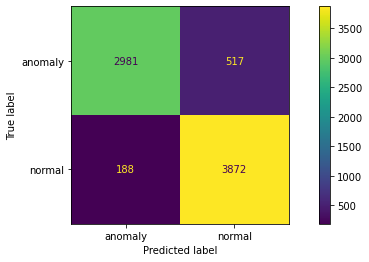

In [ ]:
plot_confusion_matrix(NB_model, X_test, Y_test, values_format='d')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train) # Train model

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rf_train_accuracy = accuracy_score(Y_train, y_train_pred)
rf_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
rf_train_f1 = f1_score(Y_train, y_train_pred, pos_label='anomaly', average='binary')
precision_train, recall_train, fscore_train, support_train = score(Y_train, y_train_pred, pos_label='anomaly', average='binary')

rf_test_accuracy = accuracy_score(Y_test, y_test_pred)
rf_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
rf_test_f1 = f1_score(Y_test, y_test_pred, pos_label='anomaly', average='binary')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')

print('Training set')
print('Precision: {}, recall: {}'.format(precision_train, recall_train))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(rf_train_accuracy, rf_train_mcc, rf_train_f1))
print('----------------------------------')
print('Test Set')
print('Precision: {}, recall: {}'.format(precision, recall))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(rf_test_accuracy, rf_test_mcc, rf_test_f1))

Training set
Precision: 1.0, recall: 1.0
Accuracy: 1.0
MCC: 1.0,
F1 Score: 1.0
----------------------------------
Test Set
Precision: 0.9968526466380544, recall: 0.9959977129788451
Accuracy: 0.9966922466260916
MCC: 0.9933476333583944,
F1 Score: 0.9964249964249965


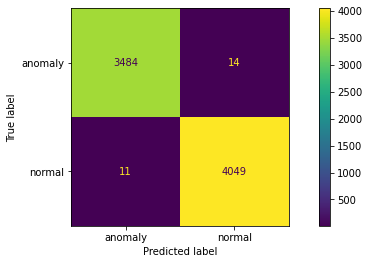

In [ ]:
plot_confusion_matrix(rf, X_test, Y_test, values_format='d')

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train) # Train model
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

knn_train_accuracy = accuracy_score(Y_train, y_train_pred)
knn_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
knn_train_f1 = f1_score(Y_train, y_train_pred, pos_label='anomaly', average='binary')
precision_train, recall_train, fscore_train, support_train = score(Y_train, y_train_pred, pos_label='anomaly', average='binary')

knn_test_accuracy = accuracy_score(Y_test, y_test_pred)
knn_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
knn_test_f1 = f1_score(Y_test, y_test_pred, pos_label='anomaly', average='binary')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')

print('Training set')
print('Precision: {}, recall: {}'.format(precision_train, recall_train))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(knn_train_accuracy, knn_train_mcc, knn_train_f1))
print('----------------------------------')
print('Test Set')
print('Precision: {}, recall: {}'.format(precision, recall))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(knn_test_accuracy, knn_test_mcc, knn_test_f1))

Training set
Precision: 1.0, recall: 1.0
Accuracy: 1.0
MCC: 1.0,
F1 Score: 1.0
----------------------------------
Test Set
Precision: 0.9968526466380544, recall: 0.9959977129788451
Accuracy: 0.9966922466260916
MCC: 0.9933476333583944,
F1 Score: 0.9964249964249965


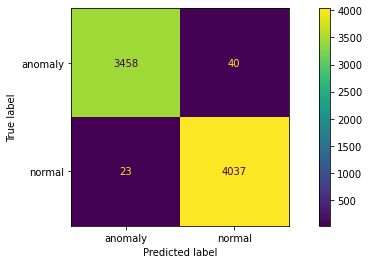

In [ ]:
plot_confusion_matrix(knn, X_test, Y_test, values_format='d')

## XG Boost

---Testing Dataset---
Accuracy: 0.9965407735057276
	F1 Score: 0.9948275862068966


---Testing Dataset---
Precision: 0.9939965694682675, 
	recall: 0.9939965694682675
Accuracy: 0.9944429743318338
	MCC: 0.9888241556751641,
	F1 Score: 0.9939965694682675


---Confusion Matrix---


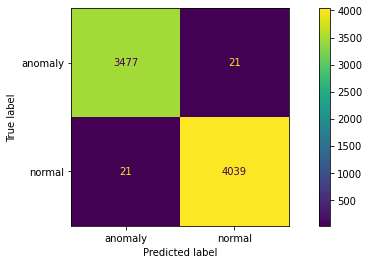

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

xgb_model_train_accuracy = accuracy_score(Y_train, y_train_pred)
xgb_model_test_accuracy = accuracy_score(Y_test, y_test_pred)
xgb_model_train_f1 = f1_score(Y_test, y_test_pred, pos_label='normal', average='binary')
print('---Testing Dataset---')
print('Accuracy: {}'.format(xgb_model_train_accuracy))
print('\tF1 Score: {}'.format(xgb_model_train_f1))

xgb_model_test_accuracy = accuracy_score(Y_test, y_test_pred)
xgb_model_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
xgb_model_test_f1 = f1_score(Y_test, y_test_pred, pos_label='anomaly', average='binary')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')
print('\n\n---Testing Dataset---')
print('Precision: {}, \n\trecall: {}'.format(precision, recall))
print('Accuracy: {}\n\tMCC: {},\n\tF1 Score: {}'.format(xgb_model_test_accuracy, xgb_model_test_mcc, xgb_model_test_f1))

print('\n\n---Confusion Matrix---')
plot_confusion_matrix(xgb_model, X_test, Y_test, values_format='d')

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier()
Ada.fit(X_train, Y_train)

y_train_pred = Ada.predict(X_train)
y_test_pred = Ada.predict(X_test)

Ada_train_accuracy = accuracy_score(Y_train, y_train_pred)
Ada_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
Ada_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') 
precision_train, recall_train, fscore_train, support_train = score(Y_train, y_train_pred, pos_label='anomaly', average='binary')

Ada_test_accuracy = accuracy_score(Y_test, y_test_pred)
Ada_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
Ada_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')

print('----------------------------------')
print('Training set')
print('Precision: {}, recall: {}'.format(precision_train, recall_train))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(Ada_train_accuracy, Ada_train_mcc, Ada_train_f1))
print('----------------------------------')
print('Test Set')
print('Precision: {}, recall: {}'.format(precision, recall))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(Ada_test_accuracy, Ada_test_mcc, Ada_test_f1))

----------------------------------
Training set
Precision: 0.9897473452947638, recall: 0.9835051546391752
Accuracy: 0.9875241011681978
MCC: 0.9749502245632361,
F1 Score: 0.9875215944410092
----------------------------------
Test Set
Precision: 0.989105504587156, recall: 0.9862778730703259
Accuracy: 0.9886213283937549
MCC: 0.9771150601550196,
F1 Score: 0.9886201824363755


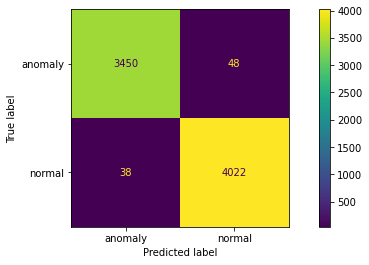

In [ ]:
plot_confusion_matrix(Ada, X_test, Y_test, values_format='d')

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, Y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

svm_train_accuracy = accuracy_score(Y_train, y_train_pred)
svm_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
svm_train_f1 = f1_score(Y_train, y_train_pred, pos_label='anomaly', average='binary')
precision_train, recall_train, fscore_train, support_train = score(Y_train, y_train_pred, pos_label='anomaly', average='binary')

svm_test_accuracy = accuracy_score(Y_test, y_test_pred)
svm_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
svm_test_f1 = f1_score(Y_test, y_test_pred, pos_label='anomaly', average='binary')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')

print('Training set')
print('Precision: {}, recall: {}'.format(precision_train, recall_train))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(svm_train_accuracy, svm_train_mcc, svm_train_f1))
print('----------------------------------')
print('Test Set')
print('Precision: {}, recall: {}'.format(precision, recall))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(svm_test_accuracy, svm_test_mcc, svm_test_f1))

Training set
Precision: 0.9855406269993602, recall: 0.9341419041843542
Accuracy: 0.962799138028808
MCC: 0.9261641841292572,
F1 Score: 0.9591531755915318
----------------------------------
Test Set
Precision: 0.986144578313253, recall: 0.9359634076615209
Accuracy: 0.9642762635617889
MCC: 0.9289513258969672,
F1 Score: 0.9603989439718392


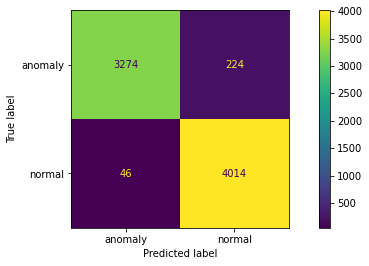

In [ ]:
plot_confusion_matrix(svm, X_test, Y_test, values_format='d')

## Ensemble Learner

## Voting Classifier

In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models
estimator_list = [
    ('xgb', xgb_model),
    ('knn',knn),
    ('svm',svm),
    # ('dt',dt),
    ('rf',rf),
    ('Ada',Ada)] 

ensemble = VotingClassifier(estimator_list, voting='soft')
results = model_selection.cross_val_score(ensemble, X_train, Y_train)
ensemble.fit(X_train, Y_train)
y_train_pred = ensemble.predict(X_train)
y_test_pred = ensemble.predict(X_test)

ensemble_model_train_accuracy = accuracy_score(Y_train, y_train_pred)
ensemble_model_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
ensemble_model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
precision_train, recall_train, fscore_train, support_train = score(Y_train, y_train_pred, pos_label='anomaly', average='binary')

ensemble_model_test_accuracy = accuracy_score(Y_test, y_test_pred)
ensemble_model_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
ensemble_model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')
 
print('\nTraining set')
print('Precision: {}, recall: {}'.format(precision_train, recall_train))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(ensemble_model_train_accuracy, ensemble_model_train_mcc, ensemble_model_train_f1))
print('----------------------------------')
print('Test Set')
print('Precision: {}, recall: {}'.format(precision, recall))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(ensemble_model_test_accuracy, ensemble_model_test_mcc, ensemble_model_test_f1))


Training set
Precision: 0.9993906897392152, recall: 0.9946634323832626
Accuracy: 0.9972212770783714
MCC: 0.9944272730874719,
F1 Score: 0.9972208629338619
----------------------------------
Test Set
Precision: 0.996553704767375, recall: 0.9919954259576901
Accuracy: 0.9947075946017465
MCC: 0.9893619404341452,
F1 Score: 0.9947067327460385


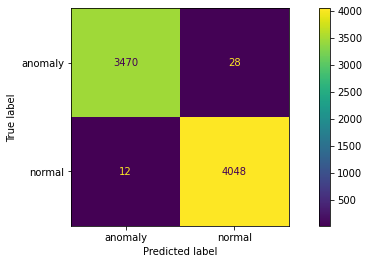

In [ ]:
plot_confusion_matrix(ensemble, X_test, Y_test, values_format='d')

## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
estimator_list = [
    ('xgb', xgb_model),
    ('knn', knn),
    ('svm',svm),
    # ('dt',dt),
    ('rf',rf),
    ('Ada',Ada) 
    ]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

stack_model.fit(X_train, Y_train)
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

stack_model_train_accuracy = accuracy_score(Y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
stack_model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
precision_train, recall_train, fscore_train, support_train = score(Y_train, y_train_pred, pos_label='anomaly', average='binary')

stack_model_test_accuracy = accuracy_score(Y_test, y_test_pred)
stack_model_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
stack_model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
precision, recall, fscore , support = score(Y_test, y_test_pred, pos_label='anomaly', average='binary')

print('----------------------------------')
print('\nTraining set')
print(stack_model_train_accuracy)
print('Precision: {}, recall: {}'.format(precision_train, recall_train))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(stack_model_train_accuracy, stack_model_train_mcc, stack_model_train_f1))
print('----------------------------------')
print('Test Set')
print(stack_model_test_accuracy)
print('Precision: {}, recall: {}'.format(precision, recall))
print('Accuracy: {}\nMCC: {},\nF1 Score: {}'.format(stack_model_test_accuracy, stack_model_test_mcc, stack_model_test_f1))

----------------------------------

Training set
1.0
Precision: 1.0, recall: 1.0
Accuracy: 1.0
MCC: 1.0,
F1 Score: 1.0
----------------------------------
Test Set
0.9966922466260916
Precision: 0.9962846527579309, recall: 0.9965694682675815
Accuracy: 0.9966922466260916
MCC: 0.9933478784971895,
F1 Score: 0.9966922792910091


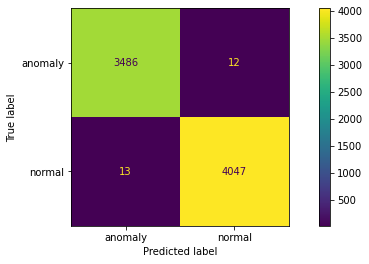

In [ ]:
plot_confusion_matrix(stack_model, X_test, Y_test, values_format='d')

## Saving the models

In [ ]:
!mkdir Models

In [ ]:
pickle.dump(svm, open('/content/Models/svm_model.sav', 'wb'))
pickle.dump(xgb_model, open('/content/Models/xgb_model.sav', 'wb'))
pickle.dump(knn, open('/content/Models/knn_model.sav', 'wb'))
pickle.dump(rf, open('/content/Models/rf_model.sav', 'wb'))
pickle.dump(Ada, open('/content/Models/Ada_model.sav', 'wb'))
pickle.dump(stack_model, open('/content/Models/stack_model.sav', 'wb'))
pickle.dump(xgb_model, open('/content/Models/xgb_model.sav', 'wb'))
pickle.dump(ensemble, open('/content/Models/voting.sav', 'wb'))
pickle.dump(ensemble, open('/content/Models/nb_model.sav', 'wb'))

In [ ]:
## Making randomly Created single predictions

In [ ]:
def Pre_To_Predict(To_predict):
  scaler1 = pickle.load(open('/content/scaler.pkl','rb'))
  single_col = To_predict.select_dtypes(include=['float64', 'int64']).columns
  To_predict1 = scaler1.transform(To_predict.select_dtypes(include=['float64', 'int64'])) 
  To_predict1 = pd.DataFrame(To_predict1, columns = single_col)
  To_predict2_col = To_predict.select_dtypes(include=['object']).columns

  encoder_service = LabelEncoder()
  encoder_service.fit(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
        'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
        'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
        'hostnames', 'http', 'http_443', 'http_8001', 'imap5', 'iso_tsap',
        'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name',
        'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp',
        'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer',
        'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp',
        'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i',
        'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'])
  encoder_protocol_type = LabelEncoder()
  encoder_protocol_type.fit(['icmp', 'tcp', 'udp'])
  encoder_flag = LabelEncoder()
  encoder_flag.fit(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'])
  
  array_service = encoder_service.transform(To_predict['service'].values)
  array_protocol = encoder_protocol_type.transform(To_predict['protocol_type'].values)
  array_flag = encoder_flag.transform(To_predict['flag'].values)
  array_service, array_protocol, array_flag

  full_array = np.array([[array_protocol[0],array_service[0],array_flag[0]]])
  To_predict2 = pd.DataFrame(full_array, columns=To_predict2_col)
  Final_to_predict = pd.concat([To_predict1,To_predict2],axis=1)

  return Final_to_predict

In [ ]:
To_predict = test.sample(1)
try:
  print(To_predict['class'])
  To_predict = To_predict.drop('class', axis=1)
  print()
except:
  print('No Class')
  print()

To_predict

605    anomaly
Name: class, dtype: object



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
605,13488,tcp,other,RSTR,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,255,2,0.01,0.68,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
try:
  train_d = Pre_To_Predict(To_predict=To_predict)
  train_d
except:
  print('Sorry I haven\'t seen something like this before\nSo I cannot predict')

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,41,4


In [ ]:
xgb_says = xgb_model.predict(train_d)
knn_says = knn.predict(train_d)
rf_says = rf.predict(train_d)
svm_says = svm.predict(train_d)
stack_says = stack_model.predict(train_d)
ensemble_says = ensemble.predict(train_d)
NB_says = NB_model.predict(train_d)

print('--> NB says: {}'.format(NB_says[0]))
print('--> xgb says: {}'.format(xgb_says[0]))
print('--> knn says: {}'.format(knn_says[0]))
print('--> rf says: {}'.format(rf_says[0]))
print('--> svm says: {}'.format(svm_says[0]))
print('\n----------------Hybrid Learning----------------------')
print('ensembler says: {}'.format(ensemble_says[0]))
print('stack says: {}'.format(stack_says[0]))

--> rf says: normal
